- 데이터 불러오기
- 데이터 확인하기 (head, info, 상위 10개)
- null값 채우기 (상품 평가 진열 위치, 상품 설명 표시)
- 각 값의 평균, 합계 구해보기(description) 
- 할인권 사용 회수 5단위 끊기
- 거래기간 /30 -> 개월로 표시
- 총 매출액  100만원 단위로 표시
- 1회 평균 매출액 100만원 단위 표시
- 총 매출액 - 총할인 금액 = 순수 매출액
- 순수 매출액 100만원 단위 
- RFM점수 합계
- 전체 만족도(상품만족도 +매장만족도+ 서비스 만족도)
- 직원평가합계
- 공간평가 합계
- 상품평가 합계
- 쓸모 없는 변수 제거 (,고객 ID, 더미변수, rfm, 상품 진열 위치, 상품 설명 표시, 안내표지판 설치)
- 친절성, 신속성, 책임성, 정확성, 전문성 시각화해서 가장 부족한 영역 찾기
- 상품 품질,상품 다양성 , 가격 적절성 , 상품진열 위치 , 상품 설명 표시 시각화해서 가장 부족한 영역 찾기
- '매장 청결성 + 공간편의성 + 시야 확보성 + 음향 적절성' 시각화해서 가장 부족한 영역 찾기
- 상품만족도와 상품 품질,상품 다양성, 가격 적절성 상관관계 (뭐가 제일 높은지?)
  매장만족도와 매장 청결성 + 공간편의성 + 시야 확보성 + 음향 적절성 /서비스 만족도와 절성, 신속성, 책임성, 정확성, 전문성 상관관계 (뭐가 제일 높은지?)
  >히트맵
- 이탈고객 vs 현재고객 (다양한 영역 비교) group by 함수로 나타내기 
- 고객 등급 groupby로 나타내기 
- 고객 나이대 별 groupby 나타내기
- 전체 상관관계
- 이탈고객, 이탈x 고객 나누기 
- 구매유형 시각화 (막대 그래프 어떤 유형이 제일 많은지) (전체, 이탈고객, 이탈x 고객)
- 나이 대 & 성별 같이 나타내기(전체, 이탈고객, 이탈x 고객)
- 고객 등급과 상관관계
- 클러스터링(현재 있는 고객 중 이탈 위험이 있는 고객)
- 네이버 영화 크롤링하기
- 컨테이너 설정
- 저장 

5. 상관관계분석
6. 히트맵그리기
- 이탈 고객값 제거 (group묶기)

In [1]:
import pandas as pd

In [5]:
import pandas as pd

In [10]:
#1. 데이터의 txt파일을 열기
df = pd.read_csv('Ashopping.txt', sep = '\t', engine='python', encoding = 'cp949')
df.head()

,고객ID,이탈여부,총 매출액,방문빈도,1회 평균매출액,할인권 사용 횟수,총 할인 금액,고객등급,구매유형,클레임접수여부,...,음향 적절성,안내 표지판 설명,친절성,신속성,책임성,정확성,전문성,D1,D2,D3
0,1,0,4007080,17,235711,1,5445,1,4,0,...,6,6,6,6,6,6,6,0,0,1
1,2,1,3168400,14,226314,22,350995,2,4,0,...,6,6,5,3,6,6,6,0,0,1
2,3,0,2680780,18,148932,6,186045,1,4,1,...,6,6,7,7,6,6,7,0,0,1
3,4,0,5946600,17,349800,1,5195,1,4,1,...,6,6,6,6,6,5,6,0,0,1
4,5,0,13745950,73,188301,9,246350,1,2,0,...,6,5,5,6,6,5,6,1,0,0


In [11]:
df.info

<bound method DataFrame.info of      고객ID  이탈여부     총 매출액  방문빈도  1회 평균매출액  할인권 사용 횟수  총 할인 금액  고객등급  구매유형  \
0       1     0   4007080    17    235711          1     5445     1     4   
1       2     1   3168400    14    226314         22   350995     2     4   
2       3     0   2680780    18    148932          6   186045     1     4   
3       4     0   5946600    17    349800          1     5195     1     4   
4       5     0  13745950    73    188301          9   246350     1     2   
5       6     0   3323610    26    127831         20   348145     1     4   
6       7     0   2369340     6    394890         30   380945     1     1   
7       8     0  12717240   109    116672          4   354735     1     2   
8       9     0   6899100    17    405829         17   364895     1     4   
9      10     0   4461040    19    234792         27   357645     1     4   
10     11     0   7080050    88     80455         23   379900     1     2   
11     12     0   5987220    39    153518   

In [12]:
#데이터의 shape 확인하기
df.shape

(1000, 42)

In [13]:
df[0:10]

,고객ID,이탈여부,총 매출액,방문빈도,1회 평균매출액,할인권 사용 횟수,총 할인 금액,고객등급,구매유형,클레임접수여부,...,음향 적절성,안내 표지판 설명,친절성,신속성,책임성,정확성,전문성,D1,D2,D3
0,1,0,4007080,17,235711,1,5445,1,4,0,...,6,6,6,6,6,6,6,0,0,1
1,2,1,3168400,14,226314,22,350995,2,4,0,...,6,6,5,3,6,6,6,0,0,1
2,3,0,2680780,18,148932,6,186045,1,4,1,...,6,6,7,7,6,6,7,0,0,1
3,4,0,5946600,17,349800,1,5195,1,4,1,...,6,6,6,6,6,5,6,0,0,1
4,5,0,13745950,73,188301,9,246350,1,2,0,...,6,5,5,6,6,5,6,1,0,0
5,6,0,3323610,26,127831,20,348145,1,4,0,...,6,5,5,5,6,6,5,0,0,1
6,7,0,2369340,6,394890,30,380945,1,1,0,...,4,6,5,4,5,5,4,0,0,0
7,8,0,12717240,109,116672,4,354735,1,2,1,...,7,6,6,5,6,6,6,1,0,0
8,9,0,6899100,17,405829,17,364895,1,4,0,...,6,6,6,6,6,5,6,0,0,1
9,10,0,4461040,19,234792,27,357645,1,4,0,...,6,6,6,6,6,6,6,0,0,1


In [14]:
#데이터의 info 확인하기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 42 columns):
고객ID                1000 non-null int64
이탈여부                1000 non-null int64
총 매출액               1000 non-null int64
방문빈도                1000 non-null int64
1회 평균매출액            1000 non-null int64
할인권 사용 횟수           1000 non-null int64
총 할인 금액             1000 non-null int64
고객등급                1000 non-null int64
구매유형                1000 non-null int64
클레임접수여부             1000 non-null int64
구매 카테고리 수           1000 non-null int64
거주지역                1000 non-null int64
성별                  1000 non-null int64
고객 나이대              1000 non-null int64
거래기간                1000 non-null int64
할인민감여부              1000 non-null int64
멤버쉽 프로그램 가입전 만족도    1000 non-null int64
멤버쉽 프로그램 가입후 만족도    1000 non-null int64
Recency             1000 non-null int64
Frequency           1000 non-null int64
Monetary            1000 non-null int64
상품 만족도              1000 non-null int64
매장 만족도        

In [17]:
df['성별']

0      1
1      1
2      1
3      1
4      0
5      1
6      1
7      1
8      1
9      1
10     0
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     0
21     1
22     1
23     1
24     1
25     0
26     1
27     1
28     1
29     1
      ..
970    0
971    1
972    0
973    1
974    0
975    1
976    0
977    0
978    1
979    1
980    1
981    1
982    1
983    1
984    1
985    1
986    1
987    1
988    1
989    1
990    1
991    1
992    1
993    1
994    1
995    1
996    0
997    0
998    1
999    1
Name: 성별, Length: 1000, dtype: int64

In [19]:
df['고객 나이대']

0      4
1      1
2      6
3      6
4      6
5      5
6      6
7      4
8      3
9      6
10     4
11     4
12     5
13     4
14     6
15     4
16     3
17     3
18     5
19     8
20     6
21     7
22     4
23     7
24     3
25     5
26     9
27     3
28     4
29     5
      ..
970    3
971    3
972    6
973    4
974    5
975    2
976    6
977    6
978    8
979    3
980    3
981    7
982    1
983    5
984    6
985    1
986    4
987    6
988    6
989    9
990    3
991    7
992    2
993    6
994    6
995    3
996    6
997    2
998    6
999    8
Name: 고객 나이대, Length: 1000, dtype: int64

In [20]:
df['거래기간']

0      1079
1       537
2      1080
3      1019
4      1086
5      1089
6       874
7      1093
8      1027
9       986
10     1093
11     1074
12     1058
13     1075
14     1068
15     1039
16     1077
17     1068
18      615
19     1084
20     1024
21     1042
22     1060
23     1049
24     1056
25     1037
26     1049
27     1067
28     1031
29      985
       ... 
970     969
971    1004
972    1091
973     941
974    1049
975    1033
976    1051
977    1030
978     979
979    1054
980     881
981    1047
982    1074
983    1045
984    1093
985    1023
986    1065
987    1045
988    1083
989     924
990    1051
991    1086
992    1082
993    1064
994    1074
995    1051
996    1038
997    1092
998    1069
999    1072
Name: 거래기간, Length: 1000, dtype: int64

In [21]:
df.isnull()

,고객ID,이탈여부,총 매출액,방문빈도,1회 평균매출액,할인권 사용 횟수,총 할인 금액,고객등급,구매유형,클레임접수여부,...,음향 적절성,안내 표지판 설명,친절성,신속성,책임성,정확성,전문성,D1,D2,D3
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [22]:
null = df.isnull()


In [23]:
#데이터에 null 값이 있는지 확인
null = df.isnull()
for col in  null.columns :
    null_count = null[col].value_counts()
    try:
        print(col, " : ", null[True])
    except :
        print(col, " : ", 0)

고객ID  :  0
이탈여부  :  0
총 매출액  :  0
방문빈도  :  0
1회 평균매출액  :  0
할인권 사용 횟수  :  0
총 할인 금액  :  0
고객등급  :  0
구매유형  :  0
클레임접수여부  :  0
구매 카테고리 수  :  0
거주지역  :  0
성별  :  0
고객 나이대  :  0
거래기간  :  0
할인민감여부  :  0
멤버쉽 프로그램 가입전 만족도  :  0
멤버쉽 프로그램 가입후 만족도  :  0
Recency  :  0
Frequency  :  0
Monetary  :  0
상품 만족도  :  0
매장 만족도  :  0
서비스 만족도  :  0
상품 품질  :  0
상품 다양성  :  0
가격 적절성  :  0
상품 진열 위치  :  0
상품 설명 표시  :  0
매장 청결성  :  0
공간 편의성  :  0
시야 확보성  :  0
음향 적절성  :  0
안내 표지판 설명  :  0
친절성  :  0
신속성  :  0
책임성  :  0
정확성  :  0
전문성  :  0
D1  :  0
D2  :  0
D3  :  0


,고객ID,이탈여부,총 매출액,방문빈도,1회 평균매출액,할인권 사용 횟수,총 할인 금액,고객등급,구매유형,클레임접수여부,...,음향 적절성,안내 표지판 설명,친절성,신속성,책임성,정확성,전문성,D1,D2,D3
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [28]:
df['거래기간']

0      1079
1       537
2      1080
3      1019
4      1086
5      1089
6       874
7      1093
8      1027
9       986
10     1093
11     1074
12     1058
13     1075
14     1068
15     1039
16     1077
17     1068
18      615
19     1084
20     1024
21     1042
22     1060
23     1049
24     1056
25     1037
26     1049
27     1067
28     1031
29      985
       ... 
970     969
971    1004
972    1091
973     941
974    1049
975    1033
976    1051
977    1030
978     979
979    1054
980     881
981    1047
982    1074
983    1045
984    1093
985    1023
986    1065
987    1045
988    1083
989     924
990    1051
991    1086
992    1082
993    1064
994    1074
995    1051
996    1038
997    1092
998    1069
999    1072
Name: 거래기간, Length: 1000, dtype: int64

TypeError: cannot convert the series to <class 'int'>

In [31]:
df.replace(".",np.nan)

NameError: name 'np' is not defined

In [32]:
import numpy as np

In [33]:
# . 값을 np.nan 값으로 바꾸고 0값으로 바꾸기
import numpy as np
df.replace(".",np.nan)
df

,고객ID,이탈여부,총 매출액,방문빈도,1회 평균매출액,할인권 사용 횟수,총 할인 금액,고객등급,구매유형,클레임접수여부,...,음향 적절성,안내 표지판 설명,친절성,신속성,책임성,정확성,전문성,D1,D2,D3
0,1,0,4007080,17,235711,1,5445,1,4,0,...,6,6,6,6,6,6,6,0,0,1
1,2,1,3168400,14,226314,22,350995,2,4,0,...,6,6,5,3,6,6,6,0,0,1
2,3,0,2680780,18,148932,6,186045,1,4,1,...,6,6,7,7,6,6,7,0,0,1
3,4,0,5946600,17,349800,1,5195,1,4,1,...,6,6,6,6,6,5,6,0,0,1
4,5,0,13745950,73,188301,9,246350,1,2,0,...,6,5,5,6,6,5,6,1,0,0
5,6,0,3323610,26,127831,20,348145,1,4,0,...,6,5,5,5,6,6,5,0,0,1
6,7,0,2369340,6,394890,30,380945,1,1,0,...,4,6,5,4,5,5,4,0,0,0
7,8,0,12717240,109,116672,4,354735,1,2,1,...,7,6,6,5,6,6,6,1,0,0
8,9,0,6899100,17,405829,17,364895,1,4,0,...,6,6,6,6,6,5,6,0,0,1
9,10,0,4461040,19,234792,27,357645,1,4,0,...,6,6,6,6,6,6,6,0,0,1


In [34]:
#데이터에 null 값이 있는지 확인
null = df.isnull()
for col in  null.columns :
    null_count = null[col].value_counts()
    try:
        print(col, " : ", null[True])
    except :
        print(col, " : ", 0)

고객ID  :  0
이탈여부  :  0
총 매출액  :  0
방문빈도  :  0
1회 평균매출액  :  0
할인권 사용 횟수  :  0
총 할인 금액  :  0
고객등급  :  0
구매유형  :  0
클레임접수여부  :  0
구매 카테고리 수  :  0
거주지역  :  0
성별  :  0
고객 나이대  :  0
거래기간  :  0
할인민감여부  :  0
멤버쉽 프로그램 가입전 만족도  :  0
멤버쉽 프로그램 가입후 만족도  :  0
Recency  :  0
Frequency  :  0
Monetary  :  0
상품 만족도  :  0
매장 만족도  :  0
서비스 만족도  :  0
상품 품질  :  0
상품 다양성  :  0
가격 적절성  :  0
상품 진열 위치  :  0
상품 설명 표시  :  0
매장 청결성  :  0
공간 편의성  :  0
시야 확보성  :  0
음향 적절성  :  0
안내 표지판 설명  :  0
친절성  :  0
신속성  :  0
책임성  :  0
정확성  :  0
전문성  :  0
D1  :  0
D2  :  0
D3  :  0


In [36]:
df.isnull().sum()

고객ID                0
이탈여부                0
총 매출액               0
방문빈도                0
1회 평균매출액            0
할인권 사용 횟수           0
총 할인 금액             0
고객등급                0
구매유형                0
클레임접수여부             0
구매 카테고리 수           0
거주지역                0
성별                  0
고객 나이대              0
거래기간                0
할인민감여부              0
멤버쉽 프로그램 가입전 만족도    0
멤버쉽 프로그램 가입후 만족도    0
Recency             0
Frequency           0
Monetary            0
상품 만족도              0
매장 만족도              0
서비스 만족도             0
상품 품질               0
상품 다양성              0
가격 적절성              0
상품 진열 위치            0
상품 설명 표시            0
매장 청결성              0
공간 편의성              0
시야 확보성              0
음향 적절성              0
안내 표지판 설명           0
친절성                 0
신속성                 0
책임성                 0
정확성                 0
전문성                 0
D1                  0
D2                  0
D3                  0
dtype: int64

In [37]:
#1. 데이터의 txt파일을 열기
df1 = pd.read_csv('Ashopping.txt', sep = '\t', engine='python', encoding = 'cp949')
df1.head()

,고객ID,이탈여부,총 매출액,방문빈도,1회 평균매출액,할인권 사용 횟수,총 할인 금액,고객등급,구매유형,클레임접수여부,...,음향 적절성,안내 표지판 설명,친절성,신속성,책임성,정확성,전문성,D1,D2,D3
0,1,0,4007080,17,235711,1,5445,1,4,0,...,6,6,6,6,6,6,6,0,0,1
1,2,1,3168400,14,226314,22,350995,2,4,0,...,6,6,5,3,6,6,6,0,0,1
2,3,0,2680780,18,148932,6,186045,1,4,1,...,6,6,7,7,6,6,7,0,0,1
3,4,0,5946600,17,349800,1,5195,1,4,1,...,6,6,6,6,6,5,6,0,0,1
4,5,0,13745950,73,188301,9,246350,1,2,0,...,6,5,5,6,6,5,6,1,0,0


In [40]:
# '총 매출액- 총 할인 금액' 값으로 "순수 매출액" 항목 추가하기 
df["순수 매출액"]=(df["총 매출액"]-df["총 할인 금액"])
df

,고객ID,이탈여부,총 매출액,방문빈도,1회 평균매출액,할인권 사용 횟수,총 할인 금액,고객등급,구매유형,클레임접수여부,...,안내 표지판 설명,친절성,신속성,책임성,정확성,전문성,D1,D2,D3,순수 매출액
0,1,0,4007080,17,235711,1,5445,1,4,0,...,6,6,6,6,6,6,0,0,1,4001635
1,2,1,3168400,14,226314,22,350995,2,4,0,...,6,5,3,6,6,6,0,0,1,2817405
2,3,0,2680780,18,148932,6,186045,1,4,1,...,6,7,7,6,6,7,0,0,1,2494735
3,4,0,5946600,17,349800,1,5195,1,4,1,...,6,6,6,6,5,6,0,0,1,5941405
4,5,0,13745950,73,188301,9,246350,1,2,0,...,5,5,6,6,5,6,1,0,0,13499600
5,6,0,3323610,26,127831,20,348145,1,4,0,...,5,5,5,6,6,5,0,0,1,2975465
6,7,0,2369340,6,394890,30,380945,1,1,0,...,6,5,4,5,5,4,0,0,0,1988395
7,8,0,12717240,109,116672,4,354735,1,2,1,...,6,6,5,6,6,6,1,0,0,12362505
8,9,0,6899100,17,405829,17,364895,1,4,0,...,6,6,6,6,5,6,0,0,1,6534205
9,10,0,4461040,19,234792,27,357645,1,4,0,...,6,6,6,6,6,6,0,0,1,4103395


In [41]:
# '친절성+신속성+책임성+정확성+전문성' 값으로 "직원평가 합계" 항목 추가하기 
df["직원평가 합계"]=(df["친절성"]+df["신속성"]+df["책임성"]+df["정확성"]+df["전문성"])
df

,고객ID,이탈여부,총 매출액,방문빈도,1회 평균매출액,할인권 사용 횟수,총 할인 금액,고객등급,구매유형,클레임접수여부,...,친절성,신속성,책임성,정확성,전문성,D1,D2,D3,순수 매출액,직원평가 합계
0,1,0,4007080,17,235711,1,5445,1,4,0,...,6,6,6,6,6,0,0,1,4001635,30
1,2,1,3168400,14,226314,22,350995,2,4,0,...,5,3,6,6,6,0,0,1,2817405,26
2,3,0,2680780,18,148932,6,186045,1,4,1,...,7,7,6,6,7,0,0,1,2494735,33
3,4,0,5946600,17,349800,1,5195,1,4,1,...,6,6,6,5,6,0,0,1,5941405,29
4,5,0,13745950,73,188301,9,246350,1,2,0,...,5,6,6,5,6,1,0,0,13499600,28
5,6,0,3323610,26,127831,20,348145,1,4,0,...,5,5,6,6,5,0,0,1,2975465,27
6,7,0,2369340,6,394890,30,380945,1,1,0,...,5,4,5,5,4,0,0,0,1988395,23
7,8,0,12717240,109,116672,4,354735,1,2,1,...,6,5,6,6,6,1,0,0,12362505,29
8,9,0,6899100,17,405829,17,364895,1,4,0,...,6,6,6,5,6,0,0,1,6534205,29
9,10,0,4461040,19,234792,27,357645,1,4,0,...,6,6,6,6,6,0,0,1,4103395,30


In [42]:
from matplotlib import pyplot as plt 


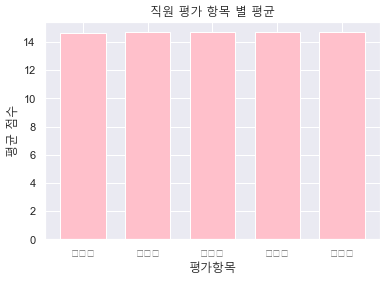

In [122]:
# 친절성, 신속성, 책임성, 정확성, 전문성 시각화해서 가장 부족한 영역 찾기
from matplotlib import pyplot as plt 

x = ['친절성', '신속성', '책임성', '정확성', '전문성']
y = [df["친절성"].mean(), df["신속성"].mean(), df["책임성"].mean(), df["정확성"].mean(), df["전문성"].mean()]
plt.title('직원 평가 항목 별 평균', fontname ='Malgun Gothic')
plt.xlabel('평가항목', fontname ='Malgun Gothic')
plt.ylabel('평균 점수', fontname ='Malgun Gothic')
plt.bar(x, y, width = 0.7, color = 'pink')
plt.show()


In [68]:
# '상품 품질 + 상품 다양성 + 가격 적절성 + 상품진열 위치 + 상품 설명 표시' 값으로 "상품평가 합계" 항목 추가하기 
df["상품평가 합계"]=(df["상품 품질"]+df["상품 다양성"]+df["가격 적절성"])
df

,고객ID,이탈여부,총 매출액,방문빈도,1회 평균매출액,할인권 사용 횟수,총 할인 금액,고객등급,구매유형,클레임접수여부,...,신속성,책임성,정확성,전문성,D1,D2,D3,순수 매출액,직원평가 합계,상품평가 합계
0,1,0,4007080,17,235711,1,5445,1,4,0,...,6,6,6,6,0,0,1,4001635,30,20
1,2,1,3168400,14,226314,22,350995,2,4,0,...,3,6,6,6,0,0,1,2817405,26,19
2,3,0,2680780,18,148932,6,186045,1,4,1,...,7,6,6,7,0,0,1,2494735,33,19
3,4,0,5946600,17,349800,1,5195,1,4,1,...,6,6,5,6,0,0,1,5941405,29,18
4,5,0,13745950,73,188301,9,246350,1,2,0,...,6,6,5,6,1,0,0,13499600,28,17
5,6,0,3323610,26,127831,20,348145,1,4,0,...,5,6,6,5,0,0,1,2975465,27,21
6,7,0,2369340,6,394890,30,380945,1,1,0,...,4,5,5,4,0,0,0,1988395,23,14
7,8,0,12717240,109,116672,4,354735,1,2,1,...,5,6,6,6,1,0,0,12362505,29,18
8,9,0,6899100,17,405829,17,364895,1,4,0,...,6,6,5,6,0,0,1,6534205,29,19
9,10,0,4461040,19,234792,27,357645,1,4,0,...,6,6,6,6,0,0,1,4103395,30,20


AttributeError: 'Rectangle' object has no property 'annot'

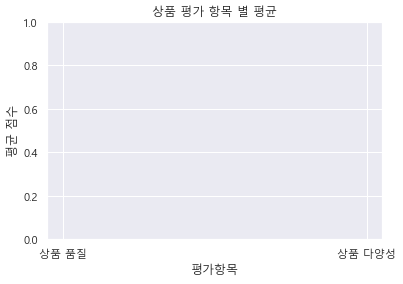

In [148]:
# 상품 품질,상품 다양성 , 가격 적절성 , 상품진열 위치 , 상품 설명 표시 시각화해서 가장 부족한 영역 찾기
from matplotlib import pyplot as plt 

x = ['상품 품질', '상품 다양성', '가격 적절성']
y = [df["상품 품질"].mean(), df["상품 다양성"].mean(), df["가격 적절성"].mean()]
plt.title('상품 평가 항목 별 평균')
plt.xlabel('평가항목')
plt.ylabel('평균 점수', fontname ='Malgun Gothic')
plt.bar(x, y, width = 0.7, color = 'pink', annot =True)
plt.ylim(0,8)
plt.show()


In [66]:
df['상품 설명 표시'] [30:200]

30     6
31     6
32     5
33     7
34     5
35     5
36     6
37     5
38     5
39     5
40     5
41     6
42     .
43     6
44     6
45     4
46     6
47     5
48     .
49     6
50     6
51     6
52     6
53     6
54     5
55     6
56     .
57     6
58     6
59     5
      ..
170    6
171    5
172    6
173    6
174    6
175    5
176    5
177    6
178    5
179    6
180    5
181    6
182    .
183    6
184    7
185    6
186    5
187    .
188    5
189    6
190    5
191    .
192    5
193    6
194    7
195    5
196    5
197    .
198    7
199    6
Name: 상품 설명 표시, Length: 170, dtype: object

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 44 columns):
고객ID                1000 non-null int64
이탈여부                1000 non-null int64
총 매출액               1000 non-null int64
방문빈도                1000 non-null int64
1회 평균매출액            1000 non-null int64
할인권 사용 횟수           1000 non-null int64
총 할인 금액             1000 non-null int64
고객등급                1000 non-null int64
구매유형                1000 non-null int64
클레임접수여부             1000 non-null int64
구매 카테고리 수           1000 non-null int64
거주지역                1000 non-null int64
성별                  1000 non-null int64
고객 나이대              1000 non-null int64
거래기간                1000 non-null int64
할인민감여부              1000 non-null int64
멤버쉽 프로그램 가입전 만족도    1000 non-null int64
멤버쉽 프로그램 가입후 만족도    1000 non-null int64
Recency             1000 non-null int64
Frequency           1000 non-null int64
Monetary            1000 non-null int64
상품 만족도              1000 non-null int64
매장 만족도        

In [72]:
df['안내 표지판 설명']

0      6
1      6
2      6
3      6
4      5
5      5
6      6
7      6
8      6
9      6
10     6
11     5
12     6
13     6
14     7
15     6
16     5
17     5
18     7
19     4
20     6
21     6
22     6
23     5
24     6
25     5
26     4
27     5
28     6
29     5
      ..
970    6
971    6
972    4
973    6
974    7
975    6
976    6
977    6
978    7
979    4
980    4
981    5
982    6
983    6
984    6
985    5
986    6
987    7
988    5
989    5
990    6
991    6
992    5
993    7
994    6
995    7
996    6
997    5
998    4
999    6
Name: 안내 표지판 설명, Length: 1000, dtype: int64

In [74]:
# '매장 청결성 + 공간편의성 + 시야 확보성 + 음향 적절성' 값으로 "상품평가 합계" 항목 추가하기 
df["매장 평가 합계"]=(df["매장 청결성"]+df["공간 편의성"]+df["시야 확보성"]+df["음향 적절성"])
df


,고객ID,이탈여부,총 매출액,방문빈도,1회 평균매출액,할인권 사용 횟수,총 할인 금액,고객등급,구매유형,클레임접수여부,...,책임성,정확성,전문성,D1,D2,D3,순수 매출액,직원평가 합계,상품평가 합계,매장 평가 합계
0,1,0,4007080,17,235711,1,5445,1,4,0,...,6,6,6,0,0,1,4001635,30,20,25
1,2,1,3168400,14,226314,22,350995,2,4,0,...,6,6,6,0,0,1,2817405,26,19,26
2,3,0,2680780,18,148932,6,186045,1,4,1,...,6,6,7,0,0,1,2494735,33,19,24
3,4,0,5946600,17,349800,1,5195,1,4,1,...,6,5,6,0,0,1,5941405,29,18,23
4,5,0,13745950,73,188301,9,246350,1,2,0,...,6,5,6,1,0,0,13499600,28,17,23
5,6,0,3323610,26,127831,20,348145,1,4,0,...,6,6,5,0,0,1,2975465,27,21,24
6,7,0,2369340,6,394890,30,380945,1,1,0,...,5,5,4,0,0,0,1988395,23,14,19
7,8,0,12717240,109,116672,4,354735,1,2,1,...,6,6,6,1,0,0,12362505,29,18,24
8,9,0,6899100,17,405829,17,364895,1,4,0,...,6,5,6,0,0,1,6534205,29,19,23
9,10,0,4461040,19,234792,27,357645,1,4,0,...,6,6,6,0,0,1,4103395,30,20,25


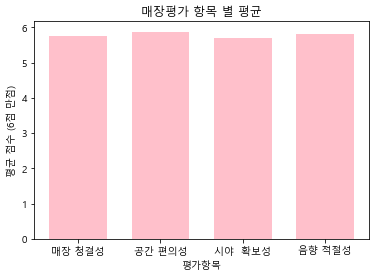

In [84]:
`15

In [108]:
df["매장 청결성"].max()

30

In [83]:
df['총 매출액'].min()

2271880

In [82]:
df['총 매출액'].max()

77070870

In [88]:
#총 매출액 100만원 단위로 나눠서 표시


0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
970    0
971    0
972    0
973    0
974    0
975    0
976    0
977    0
978    0
979    0
980    0
981    0
982    0
983    0
984    0
985    0
986    0
987    0
988    0
989    0
990    0
991    0
992    0
993    0
994    0
995    0
996    0
997    0
998    0
999    0
Name: 총 매출액, Length: 1000, dtype: int64

In [90]:
df['할인권 사용 횟수'].min()

1

In [91]:
df['할인권 사용 횟수'].max()

30

In [94]:
df['할인권 사용 횟수']

0       1
1      22
2       6
3       1
4       9
5      20
6      30
7       4
8      17
9      27
10     23
11     22
12      1
13     14
14     23
15     30
16     18
17     22
18     16
19     23
20     20
21     15
22      3
23     11
24     27
25     23
26      7
27     15
28      3
29     28
       ..
970    12
971    22
972    23
973     1
974    27
975    21
976    10
977    19
978    13
979     1
980    10
981     6
982     4
983    11
984    19
985    26
986    14
987    11
988     7
989    23
990    25
991    10
992    12
993    20
994    23
995     3
996     6
997     8
998    20
999    19
Name: 할인권 사용 횟수, Length: 1000, dtype: int64

In [96]:
#할인권 사용횟수 5단위로 나눠서 표시하기
df.loc[ df['할인권 사용 횟수'] <  5, '할인권 사용 횟수'] = 0
df.loc[ (df['할인권 사용 횟수'] >=  5) & (df['할인권 사용 횟수'] < 10)] = 5
df.loc[ (df['할인권 사용 횟수'] >=  10) & (df['할인권 사용 횟수'] < 15)] = 10
df.loc[ (df['할인권 사용 횟수'] >=  15) & (df['할인권 사용 횟수'] < 20)] = 15
df.loc[ (df['할인권 사용 횟수'] >=  20) & (df['할인권 사용 횟수'] < 25)] = 20
df.loc[ (df['할인권 사용 횟수'] >=  25) & (df['할인권 사용 횟수'] < 30)] = 25
df.loc[ df['할인권 사용 횟수'] >= 30 ] = 30
df['할인권 사용 횟수']

0       0
1      20
2       5
3       0
4       5
5      20
6      30
7       0
8      15
9      25
10     20
11     20
12      0
13     10
14     20
15     30
16     15
17     20
18     15
19     20
20     20
21     15
22      0
23     10
24     25
25     20
26      5
27     15
28      0
29     25
       ..
970    10
971    20
972    20
973     0
974    25
975    20
976    10
977    15
978    10
979     0
980    10
981     5
982     0
983    10
984    15
985    25
986    10
987    10
988     5
989    20
990    25
991    10
992    10
993    20
994    20
995     0
996     5
997     5
998    20
999    15
Name: 할인권 사용 횟수, Length: 1000, dtype: int64

In [99]:
df['1회 평균매출액'][300:400]

300        30
301        10
302        25
303        25
304        25
305         5
306        20
307        15
308        15
309        15
310        20
311        15
312        10
313        10
314        15
315         5
316         5
317        10
318        10
319        20
320        10
321        20
322        20
323        20
324        20
325        10
326         5
327        25
328        10
329    162739
        ...  
370        10
371         5
372        10
373        25
374        20
375        15
376        25
377        20
378        25
379         5
380         5
381        20
382        25
383        25
384        25
385        15
386        20
387        10
388        15
389        20
390        25
391        20
392        20
393        25
394        10
395    848590
396        25
397         5
398        25
399        15
Name: 1회 평균매출액, Length: 100, dtype: int64

In [102]:
df. loc[ df['1회 평균매출액']<10000,'1회 평균매출액'] = 0
df. loc[ df['1회 평균매출액'] >=10000,'1회 평균매출액'] = df['1회 평균매출액']//10000
df["1회 평균매출액"][300:400]

300    0
301    0
302    0
303    0
304    0
305    0
306    0
307    0
308    0
309    0
310    0
311    0
312    0
313    0
314    0
315    0
316    0
317    0
318    0
319    0
320    0
321    0
322    0
323    0
324    0
325    0
326    0
327    0
328    0
329    0
      ..
370    0
371    0
372    0
373    0
374    0
375    0
376    0
377    0
378    0
379    0
380    0
381    0
382    0
383    0
384    0
385    0
386    0
387    0
388    0
389    0
390    0
391    0
392    0
393    0
394    0
395    0
396    0
397    0
398    0
399    0
Name: 1회 평균매출액, Length: 100, dtype: int64

In [103]:
df['거래기간']

0      1079
1        20
2         5
3      1019
4         5
5        20
6        30
7      1093
8        15
9        25
10       20
11       20
12     1058
13       10
14       20
15       30
16       15
17       20
18       15
19       20
20       20
21       15
22     1060
23       10
24       25
25       20
26        5
27       15
28     1031
29       25
       ... 
970      10
971      20
972      20
973     941
974      25
975      20
976      10
977      15
978      10
979    1054
980      10
981       5
982    1074
983      10
984      15
985      25
986      10
987      10
988       5
989      20
990      25
991      10
992      10
993      20
994      20
995    1051
996       5
997       5
998      20
999      15
Name: 거래기간, Length: 1000, dtype: int64

In [106]:
a = df['거래기간']//30
print(a)

0      35
1       0
2       0
3      33
4       0
5       0
6       1
7      36
8       0
9       0
10      0
11      0
12     35
13      0
14      0
15      1
16      0
17      0
18      0
19      0
20      0
21      0
22     35
23      0
24      0
25      0
26      0
27      0
28     34
29      0
       ..
970     0
971     0
972     0
973    31
974     0
975     0
976     0
977     0
978     0
979    35
980     0
981     0
982    35
983     0
984     0
985     0
986     0
987     0
988     0
989     0
990     0
991     0
992     0
993     0
994     0
995    35
996     0
997     0
998     0
999     0
Name: 거래기간, Length: 1000, dtype: int64


In [109]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [110]:
sns.catplot(x="상품만족도", "매장만족도", "서비스 만족도", y="만족도 점수", data = df["상품 만족도"],df["매장 만족도"],df["서비스 만족도"])

SyntaxError: positional argument follows keyword argument (<ipython-input-110-3b550f83c0b4>, line 1)

In [111]:
# '매장 청결성 + 공간편의성 + 시야 확보성 + 음향 적절성' 시각화해서 가장 부족한 영역 찾기
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() 

gijun = ['매장 청결성' , '공간 편의성' , '시야  확보성' , '음향 적절성']
score = [df["매장 청결성"], df["공간 편의성"], df["시야 확보성"],df["음향 적절성"]]
sns.catplot(x = , y="만족도 점수", data = '매장청결성')

AttributeError: 'list' object has no attribute 'get'

Text(0, 0.5, '평균 점수 (6점 만점)')

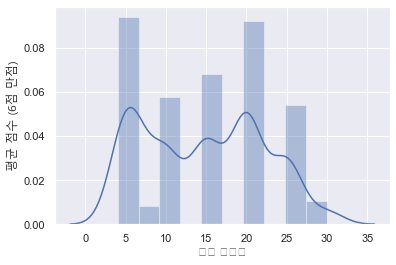

In [113]:
sns.distplot(df["매장 청결성"])
plt.ylabel('평균 점수 (6점 만점)', fontname ='Malgun Gothic')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0DBABE90>,
      dtype=object)

C:\Users\wjddl\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\wjddl\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


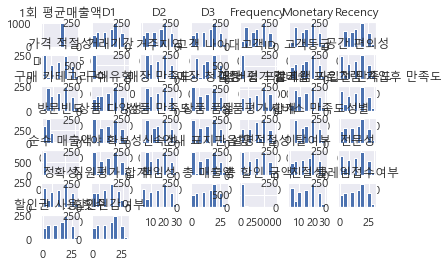

In [136]:
df.groupby('이탈여부')['고객등급']

In [137]:
grouped = df["고객등급"].groupby(df["이탈여부"])

In [138]:
grouped

In [141]:
df.groupby("이탈여부")["방문빈도","고객등급","구매유형"].mean()

,방문빈도,고객등급,구매유형
이탈여부,,,
0,25.116071,1.241071,3.348214
1,17.428571,1.428571,3.428571
5,5.000000,5.000000,5.000000
10,10.000000,10.000000,10.000000
15,15.000000,15.000000,15.000000
20,20.000000,20.000000,20.000000
25,25.000000,25.000000,25.000000
30,30.000000,30.000000,30.000000


In [142]:
df["방문빈도"]

0       17
1       20
2        5
3       17
4        5
5       20
6       30
7      109
8       15
9       25
10      20
11      20
12      12
13      10
14      20
15      30
16      15
17      20
18      15
19      20
20      20
21      15
22      12
23      10
24      25
25      20
26       5
27      15
28      12
29      25
      ... 
970     10
971     20
972     20
973      6
974     25
975     20
976     10
977     15
978     10
979     18
980     10
981      5
982     66
983     10
984     15
985     25
986     10
987     10
988      5
989     20
990     25
991     10
992     10
993     20
994     20
995      8
996      5
997      5
998     20
999     15
Name: 방문빈도, Length: 1000, dtype: int64

In [143]:
df["방문빈도"].max()

109

In [144]:
df["방문빈도"].min()

4

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 46 columns):
고객ID                1000 non-null int64
이탈여부                1000 non-null int64
총 매출액               1000 non-null int64
방문빈도                1000 non-null int64
1회 평균매출액            1000 non-null int64
할인권 사용 횟수           1000 non-null int64
총 할인 금액             1000 non-null int64
고객등급                1000 non-null int64
구매유형                1000 non-null int64
클레임접수여부             1000 non-null int64
구매 카테고리 수           1000 non-null int64
거주지역                1000 non-null int64
성별                  1000 non-null int64
고객 나이대              1000 non-null int64
거래기간                1000 non-null int64
할인민감여부              1000 non-null int64
멤버쉽 프로그램 가입전 만족도    1000 non-null int64
멤버쉽 프로그램 가입후 만족도    1000 non-null int64
Recency             1000 non-null int64
Frequency           1000 non-null int64
Monetary            1000 non-null int64
상품 만족도              1000 non-null int64
매장 만족도        

In [149]:
#1. 데이터의 txt파일을 열기
df = pd.read_csv('Ashopping.txt', sep = '\t', engine='python', encoding = 'cp949')
df.head()

,고객ID,이탈여부,총 매출액,방문빈도,1회 평균매출액,할인권 사용 횟수,총 할인 금액,고객등급,구매유형,클레임접수여부,...,음향 적절성,안내 표지판 설명,친절성,신속성,책임성,정확성,전문성,D1,D2,D3
0,1,0,4007080,17,235711,1,5445,1,4,0,...,6,6,6,6,6,6,6,0,0,1
1,2,1,3168400,14,226314,22,350995,2,4,0,...,6,6,5,3,6,6,6,0,0,1
2,3,0,2680780,18,148932,6,186045,1,4,1,...,6,6,7,7,6,6,7,0,0,1
3,4,0,5946600,17,349800,1,5195,1,4,1,...,6,6,6,6,6,5,6,0,0,1
4,5,0,13745950,73,188301,9,246350,1,2,0,...,6,5,5,6,6,5,6,1,0,0


In [150]:
product = df.loc[:,['상품 품질', '상품 다양성', '가격 적절성']]
product

,상품 품질,상품 다양성,가격 적절성
0,7,7,6
1,6,7,6
2,6,7,6
3,6,6,6
4,5,6,6
5,7,7,7
6,5,4,5
7,6,6,6
8,6,6,7
9,7,7,6


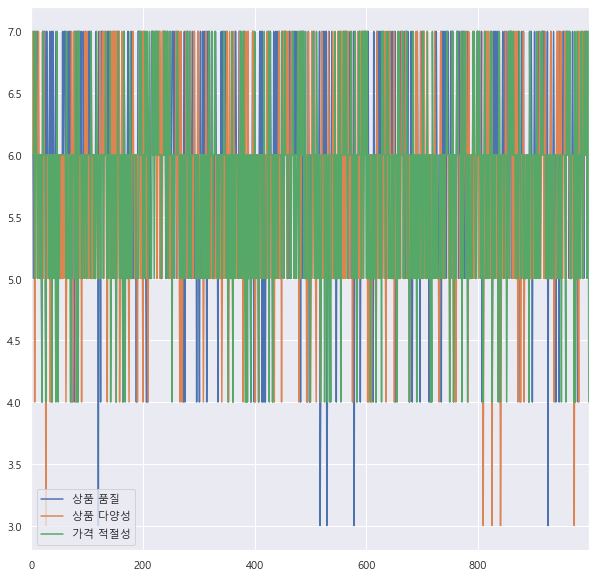

In [151]:
product.plot.line(figsize=(10,10), grid=True)

In [153]:
pumgil =  df.loc[:,['상품 품질']]

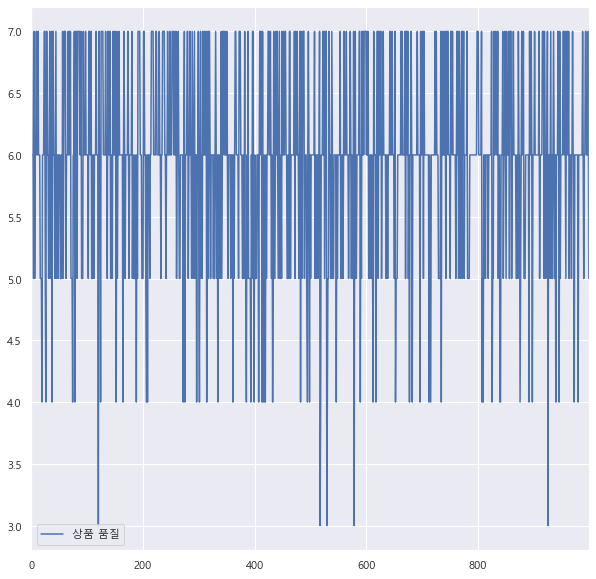

In [154]:
pumgil.plot.line(figsize=(10,10), grid=True)

In [167]:
current =  df.loc[df.이탈여부 == 0 ]

In [162]:
#1. 데이터의 txt파일을 열기
df = pd.read_csv('Ashopping.txt', sep = '\t', engine='python', encoding = 'cp949')
df.head()

,고객ID,이탈여부,총 매출액,방문빈도,1회 평균매출액,할인권 사용 횟수,총 할인 금액,고객등급,구매유형,클레임접수여부,...,음향 적절성,안내 표지판 설명,친절성,신속성,책임성,정확성,전문성,D1,D2,D3
0,1,0,4007080,17,235711,1,5445,1,4,0,...,6,6,6,6,6,6,6,0,0,1
1,2,1,3168400,14,226314,22,350995,2,4,0,...,6,6,5,3,6,6,6,0,0,1
2,3,0,2680780,18,148932,6,186045,1,4,1,...,6,6,7,7,6,6,7,0,0,1
3,4,0,5946600,17,349800,1,5195,1,4,1,...,6,6,6,6,6,5,6,0,0,1
4,5,0,13745950,73,188301,9,246350,1,2,0,...,6,5,5,6,6,5,6,1,0,0


In [165]:
df.loc[df.이탈여부 == 0]

,고객ID,이탈여부,총 매출액,방문빈도,1회 평균매출액,할인권 사용 횟수,총 할인 금액,고객등급,구매유형,클레임접수여부,...,음향 적절성,안내 표지판 설명,친절성,신속성,책임성,정확성,전문성,D1,D2,D3
0,1,0,4007080,17,235711,1,5445,1,4,0,...,6,6,6,6,6,6,6,0,0,1
2,3,0,2680780,18,148932,6,186045,1,4,1,...,6,6,7,7,6,6,7,0,0,1
3,4,0,5946600,17,349800,1,5195,1,4,1,...,6,6,6,6,6,5,6,0,0,1
4,5,0,13745950,73,188301,9,246350,1,2,0,...,6,5,5,6,6,5,6,1,0,0
5,6,0,3323610,26,127831,20,348145,1,4,0,...,6,5,5,5,6,6,5,0,0,1
6,7,0,2369340,6,394890,30,380945,1,1,0,...,4,6,5,4,5,5,4,0,0,0
7,8,0,12717240,109,116672,4,354735,1,2,1,...,7,6,6,5,6,6,6,1,0,0
8,9,0,6899100,17,405829,17,364895,1,4,0,...,6,6,6,6,6,5,6,0,0,1
9,10,0,4461040,19,234792,27,357645,1,4,0,...,6,6,6,6,6,6,6,0,0,1
10,11,0,7080050,88,80455,23,379900,1,2,0,...,6,6,6,6,6,6,6,1,0,0


In [168]:
current

,고객ID,이탈여부,총 매출액,방문빈도,1회 평균매출액,할인권 사용 횟수,총 할인 금액,고객등급,구매유형,클레임접수여부,...,음향 적절성,안내 표지판 설명,친절성,신속성,책임성,정확성,전문성,D1,D2,D3
0,1,0,4007080,17,235711,1,5445,1,4,0,...,6,6,6,6,6,6,6,0,0,1
2,3,0,2680780,18,148932,6,186045,1,4,1,...,6,6,7,7,6,6,7,0,0,1
3,4,0,5946600,17,349800,1,5195,1,4,1,...,6,6,6,6,6,5,6,0,0,1
4,5,0,13745950,73,188301,9,246350,1,2,0,...,6,5,5,6,6,5,6,1,0,0
5,6,0,3323610,26,127831,20,348145,1,4,0,...,6,5,5,5,6,6,5,0,0,1
6,7,0,2369340,6,394890,30,380945,1,1,0,...,4,6,5,4,5,5,4,0,0,0
7,8,0,12717240,109,116672,4,354735,1,2,1,...,7,6,6,5,6,6,6,1,0,0
8,9,0,6899100,17,405829,17,364895,1,4,0,...,6,6,6,6,6,5,6,0,0,1
9,10,0,4461040,19,234792,27,357645,1,4,0,...,6,6,6,6,6,6,6,0,0,1
10,11,0,7080050,88,80455,23,379900,1,2,0,...,6,6,6,6,6,6,6,1,0,0


In [171]:
plt.rcParams['font.family'] = 'Malgun Gothic'
sns.countplot(x="구매유형","성별", data=df)
plt.title('전체 고객의 구매 유형', fontname ='Malgun Gothic')
plt.xlabel('구매유형', fontname ='Malgun Gothic')
plt.ylabel('count', fontname ='Malgun Gothic')
plt.show()

SyntaxError: positional argument follows keyword argument (<ipython-input-171-8c3311a2c661>, line 2)

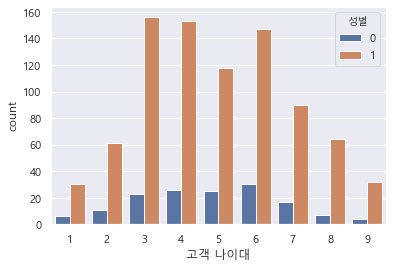

In [172]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

customer = plt.subplots()
customer = sns.countplot('고객 나이대', hue='성별', data = df)